Lo primero que debo de hacer es importar el dataset en un dataframe

In [459]:
import pandas as pd

In [460]:
dataset = pd.read_csv("titanic.csv") 

In [461]:
# Muestro solo la cabecera para ver si se ha importado bien
dataset[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Ahora indexo por nombre de pasajero

In [462]:
dataset = dataset.set_index('Name')

# Vuelvo a mostrar la cabecera para ver que se está indexando correctamente
dataset[:3]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


El siguiente paso es deletear ticket number y cabina

In [463]:
dataset = dataset.drop(columns= ['Ticket', 'Cabin'])

# Muestro la parte superior para volver a ver que se ha eliminado

dataset[ :3]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Name,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,7.2500,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,71.2833,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,7.9250,S


Siguiente paso: Análisis de columnas nulas y reemplazo de valores

In [464]:
# Se obtienen las columnas que tengan algún NaN, y le pongo el toList para obtenerlo más vistoso
dataset.columns[dataset.isna().any()].tolist()

['Age', 'Embarked']

In [465]:
# Primero obtengo la media de las columnas

print(dataset.mean())

# Ahora relleno los na con la media

dataset = dataset.fillna(dataset.mean())

# Ahora compruebo que no quede ningún na con la sentencia del chunk anterior

dataset.columns[dataset.isna().any()].tolist()

# Como queda la de embarked (normal, es categórica), tengo que rellenarla a mano

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


['Embarked']

In [466]:
# Como no tengo el valor, voy a ver la frecuencia con la que embarcaron los pasajeros
# de un lado u otro, y le asignaré el de mayor valor para la simplificación del problema

dataset.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
C,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644


In [467]:
# Como se puede ver, una gran mayoría vienen de Southampton, por lo que asignaré los NaN a allí
# Como solo hay NaN en esa columna, puedo usar libremente el método replace

import numpy as np

dataset = dataset.replace(np.NaN, 'S')

# Se comprueba si queda alguna columna con NaN

dataset.columns[dataset.isna().any()].tolist()

[]

In [468]:
# Como no queda ninguna columna con NaN, puedo proseguir.

# Lo que voy a hacer es guardar el DataFrame limpiado como csv por si se quiere utilizar posteriormente

dataset.to_csv("titanic_limpio.csv", sep=',')

Ahora es importante cambiar todas las variables categoricas a dummy

In [469]:
dataset = pd.get_dummies(data=dataset, columns=['Sex', 'Embarked'])
dataset.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,22.0,1,0,7.25,0,1,0,0,1


Siguiente paso: Separación de los datos en train y test

In [470]:
from sklearn.model_selection import train_test_split

In [471]:
x = dataset[dataset.columns[3:12]]
y = dataset.Survived

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.33, random_state = 5)

precisiones = {}

Voy a ver las correlaciones entre variables por curiosidad...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002380F64B358>,
      dtype=object)

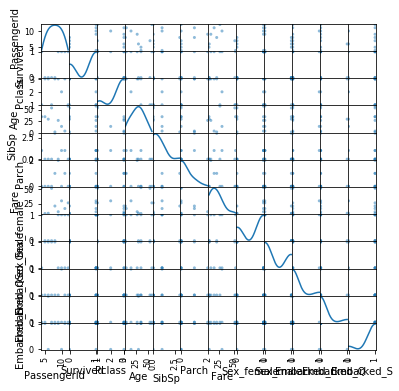

In [472]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset[3:12], alpha=0.5, figsize=(6, 6), diagonal='kde')

In [473]:
dataset.corr().style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1,-0.00500666,-0.035144,0.0332065,-0.0575268,-0.00165201,0.0126582,-0.0429389,0.0429389,-0.0012048,-0.0336057,0.0222035
Survived,-0.00500666,1,-0.338481,-0.0698085,-0.0353225,0.0816294,0.257307,0.543351,-0.543351,0.16824,0.00365038,-0.149683
Pclass,-0.035144,-0.338481,1,-0.331339,0.0830814,0.0184427,-0.5495,-0.1319,0.1319,-0.243292,0.221009,0.0740528
Age,0.0332065,-0.0698085,-0.331339,1,-0.232625,-0.179191,0.0915661,-0.0841534,0.0841534,0.0320244,-0.0138552,-0.0193356
SibSp,-0.0575268,-0.0353225,0.0830814,-0.232625,1,0.414838,0.159651,0.114631,-0.114631,-0.0595282,-0.0263537,0.0687336
Parch,-0.00165201,0.0816294,0.0184427,-0.179191,0.414838,1,0.216225,0.245489,-0.245489,-0.0110688,-0.0812281,0.0608136
Fare,0.0126582,0.257307,-0.5495,0.0915661,0.159651,0.216225,1,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,-0.0429389,0.543351,-0.1319,-0.0841534,0.114631,0.245489,0.182333,1,-1,0.0828535,0.0741151,-0.119224
Sex_male,0.0429389,-0.543351,0.1319,0.0841534,-0.114631,-0.245489,-0.182333,-1,1,-0.0828535,-0.0741151,0.119224
Embarked_C,-0.0012048,0.16824,-0.243292,0.0320244,-0.0595282,-0.0110688,0.269335,0.0828535,-0.0828535,1,-0.148258,-0.782742


Es interesante estudiar la correlación de sobrevivir con el resto, donde ser mujer resulta en el factor más decisivo

El siguiente paso ya es el entrenamiento de Machine Learning:

1) Decission Tree Classifier

In [474]:
from sklearn import tree

In [475]:
# Instanciación del algoritmo

tree = tree.DecisionTreeClassifier()

In [476]:
# Entrenamiento del algoritmo

model_tree = tree.fit(x_train, y_train)

In [477]:
#Matriz de confusión de entrenamiento
predicciones = pd.DataFrame(list(zip(model_tree.predict(x_train), y_train)), columns=['predicho', 'real'])
matriz_conf = predicciones.groupby(['predicho', 'real']).apply(lambda x: len(x))
print(matriz_conf)

print(" ")

# Matriz de confusión de test

predicciones = pd.DataFrame(list(zip(model_tree.predict(x_test), y_test)), columns=['predicho', 'real'])
matriz_conf_test = predicciones.groupby(['predicho', 'real']).apply(lambda x: len(x))
print(matriz_conf_test)

predicho  real
0         0       361
          1         7
1         0         1
          1       227
dtype: int64
 
predicho  real
0         0       158
          1        35
1         0        29
          1        73
dtype: int64


Como se puede observar, en entrenamiento: predicho muerto y real muerto hay 361 casos, mientras que se prediga que muerto y sobreviviera en realidad hay solo 7.
Por otra parte, predicho que sobreviviera y en realidad muriera solo hay 1, mientras que si se clasificó como superviviente y la realidad es que sobrevivió se da en 227 casos.

En cambio, se puede ver que en test no ha obtenido tan buenos resultados, acertando solo en 159+71 de los casos, y fallando en 37+28 de los casos

In [478]:
# Precisión

print('Precisión sobre el conjunto de entrenamiento: {:.2f}' .format(model_tree.score(x_train, y_train)))
print('Precisión sobre el conjunto de test: {:.2f}' .format(model_tree.score(x_test, y_test)))

precisiones['tree'] = model_tree.score(x_test, y_test)

Precisión sobre el conjunto de entrenamiento: 0.99
Precisión sobre el conjunto de test: 0.78


2) SGD Classifier

In [479]:
from sklearn.linear_model import SGDClassifier

In [480]:
# Instancio
sgd = SGDClassifier()

In [481]:
#Entreno
model_sgd = sgd.fit(x_train, y_train)

D:\Users\jorge\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [482]:
print('Precisión de SGD sobre el entrenamiento: {:.2f}' .format(model_sgd.score(x_train, y_train)))
print('Precisión de SGD sobre el test: {:.2f}'.format(model_sgd.score(x_test, y_test)))

precisiones['SGD'] = model_sgd.score(x_test, y_test)

Precisión de SGD sobre el entrenamiento: 0.61
Precisión de SGD sobre el test: 0.63


3) Ridge Classifier

In [483]:
from sklearn.linear_model import RidgeClassifier

In [484]:
ridge = RidgeClassifier()

In [485]:
model_ridge = ridge.fit(x_train, y_train)

In [486]:
print('Precisión de Ridge sobre entrenamiento: {:.2f}'.format(model_ridge.score(x_train, y_train)))
print('Precisión de Ridge sobre test: {:.2f}'.format(model_ridge.score(x_test, y_test)))

precisiones['Ridge'] = model_ridge.score(x_test, y_test)

Precisión de Ridge sobre entrenamiento: 0.77
Precisión de Ridge sobre test: 0.82


4) KNN

In [487]:
from sklearn.neighbors import KNeighborsClassifier

In [488]:
knn = KNeighborsClassifier()

In [489]:
model_knn = knn.fit(x_train, y_train)

In [490]:
print('Precisión de KNN sobre el conjunto de entrenamiento: {:.2f}' .format(model_knn.score(x_train, y_train)))
print('Precisión de KNN sobre el conjunto de test: {:.2f}' .format(model_knn.score(x_test, y_test)))

Precisión de KNN sobre el conjunto de entrenamiento: 0.79
Precisión de KNN sobre el conjunto de test: 0.75


In [491]:
# Voy a cambiar el n_neighbours. sqrt(total) suele ser la mejor opción
import math 

In [492]:
sqrt_total = math.sqrt(x_train.shape[0])

In [493]:
knn = KNeighborsClassifier(n_neighbors=int(sqrt_total))

In [494]:
model_knn = knn.fit(x_train, y_train)

In [495]:
print('Precisión de KNN sobre el conjunto de entrenamiento: {:.2f}' .format(model_knn.score(x_train, y_train)))
print('Precisión de KNN sobre el conjunto de test: {:.2f}' .format(model_knn.score(x_test, y_test)))

Precisión de KNN sobre el conjunto de entrenamiento: 0.70
Precisión de KNN sobre el conjunto de test: 0.72


Se ve que no mejora

In [496]:
# Voy a hacer un bucle para encontrar el mejor k
scores = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    model_knn = knn.fit(x_train, y_train)
    scores.append(model_knn.score(x_test, y_test))

In [497]:
print(max(scores))

scores.index(max(scores))

0.7457627118644068


4

In [498]:
precisiones['KNN'] = max(scores)

Por lo tanto, el K óptimo era el que venía por defecto, k = 5

5) Random Forest

In [499]:
from sklearn.ensemble import RandomForestClassifier

In [500]:
random_forest = RandomForestClassifier()

In [501]:
model_random_forest = random_forest.fit(x_train, y_train)

D:\Users\jorge\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [502]:
print('Precisión de Random Forest para el conjunto de entrenamiento: {:.2f}' .format(model_random_forest.score(x_train, y_train)))
print('Precisión de Random Forest para el conjunto de test: {:.2f}' .format(model_random_forest.score(x_test, y_test)))

precisiones['RF'] = model_random_forest.score(x_test, y_test)

Precisión de Random Forest para el conjunto de entrenamiento: 0.97
Precisión de Random Forest para el conjunto de test: 0.83


6) Gradient Boosting

In [503]:
from sklearn.ensemble import GradientBoostingClassifier

In [504]:
gb = GradientBoostingClassifier()

In [505]:
model_gb = gb.fit(x_train, y_train)

In [506]:
print('Precisión de Gradient Boosting sobre el entrenamiento: {:.2f}' .format(model_gb.score(x_train, y_train)))
print('Precisión de Gradient Boosting sobre el test: {:.2f}' .format(model_gb.score(x_test, y_test)))

precisiones['GB'] = model_gb.score(x_test, y_test)

Precisión de Gradient Boosting sobre el entrenamiento: 0.91
Precisión de Gradient Boosting sobre el test: 0.82


7) Predicción por Regresión Lineal (leer conclusión final)

In [507]:
from sklearn.linear_model import LinearRegression

In [508]:
rl = LinearRegression()

In [509]:
model_rl = rl.fit(x_train, y_train)

In [510]:
model_rl.coef_

array([-0.00283751, -0.05525248, -0.03370509,  0.00197586,  0.25959218,
       -0.25959218,  0.04999915, -0.02450496, -0.02549419])

In [511]:
pd.DataFrame({'columns': dataset.columns[3:12], 'coefs': model_rl.coef_})

,columns,coefs
0,Age,-0.002838
1,SibSp,-0.055252
2,Parch,-0.033705
3,Fare,0.001976
4,Sex_female,0.259592
5,Sex_male,-0.259592
6,Embarked_C,0.049999
7,Embarked_Q,-0.024505
8,Embarked_S,-0.025494


In [512]:
model_rl.intercept_

0.5302767363537286

In [513]:
import matplotlib.pyplot as plt

In [514]:
y_pred = model_rl.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred)) # Correlación bastante baja

precisiones['Regresion'] = r2_score(y_test, y_pred)

0.36232419102476454


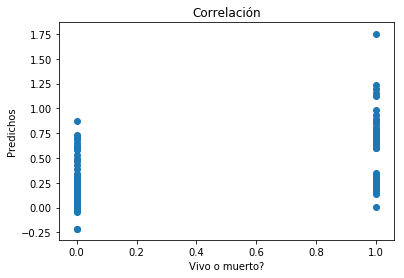

In [515]:
plt.scatter(y_test, y_pred)
plt.xlabel("Vivo o muerto?")
plt.ylabel("Predichos")
plt.title("Correlación")
plt.show()

Como se puede observar, esto no tiene demasiado sentido puesto que la variable no es continua, sino discreta. De todas maneras, es interesante observar como los que de verdad vivieron
tienen unas predicciones más altas que los que de verdad murieron, que las tienen más bajas.

Vamos a ver un poco con las Andrews Curves y las coordenadas paralelas si se pueden apreciar diferencias entre los que sobrevivieron y los que no...

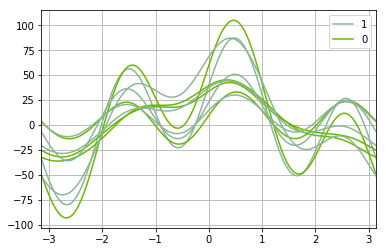

In [516]:
from pandas.plotting import andrews_curves

andrews_curves(dataset[3:12], 'Survived')

plt.show()

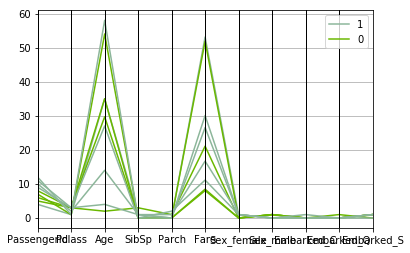

In [517]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(dataset[3:12], 'Survived')

plt.show()

Como se puede ver, no hay demasiadas diferencias usando estos dos métodos...

Finalmente, voy a hacer una comparación de los clasificadores para ver cual ha sido mejor

In [518]:
precisiones

{'tree': 0.7830508474576271,
 'SGD': 0.6338983050847458,
 'Ridge': 0.8169491525423729,
 'KNN': 0.7457627118644068,
 'RF': 0.8271186440677966,
 'GB': 0.8203389830508474,
 'Regresion': 0.36232419102476454}

Se puede observar que Gradient Boosting, junto con Ridge y Random Forest son los más precisos

Comparación con el modelo Naive

In [519]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model_nb = gnb.fit(x_train, y_train)

In [520]:
print('Precisión de Naive sobre el entrenamiento: {:.2f}' .format(model_nb.score(x_train, y_train)))
print('Precisión de Naive sobre el test: {:.2f}' .format(model_nb.score(x_test, y_test)))

Precisión de Naive sobre el entrenamiento: 0.79
Precisión de Naive sobre el test: 0.81


El modelo Naive Bayes está a la altura de Random Forest y Ridge

In [521]:
precisiones['NB'] = model_nb.score(x_test, y_test)

In [522]:
precisiones

{'tree': 0.7830508474576271,
 'SGD': 0.6338983050847458,
 'Ridge': 0.8169491525423729,
 'KNN': 0.7457627118644068,
 'RF': 0.8271186440677966,
 'GB': 0.8203389830508474,
 'Regresion': 0.36232419102476454,
 'NB': 0.8135593220338984}

Resultado final:
    1) Gradient Boosting
    2) Ridge Classifier
    3) Random Forest y Naive Bayes
    4) Tree Classifier
    5) KNN (k = 5)
    6) SGD